# Session 3: Data Visualization with Matplotlib and Seaborn

**Objective:** To learn the fundamentals of data visualization in Python to explore datasets, identify patterns, and communicate findings effectively.

In [49]:
! pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.4 MB/s eta 0:00:00a 0:00:01


## Part 1: Basic Concepts of Matplotlib

### 1. The Importance of Visualization
Why visualize data? A plot can reveal trends, outliers, and patterns that are not obvious from looking at raw numbers. It's a critical step in both data exploration and data storytelling.

### 2. Introduction to Matplotlib
Matplotlib is the foundational plotting library in Python. 
The most basic way to use it, is to use the pyplot "immediate" methods.

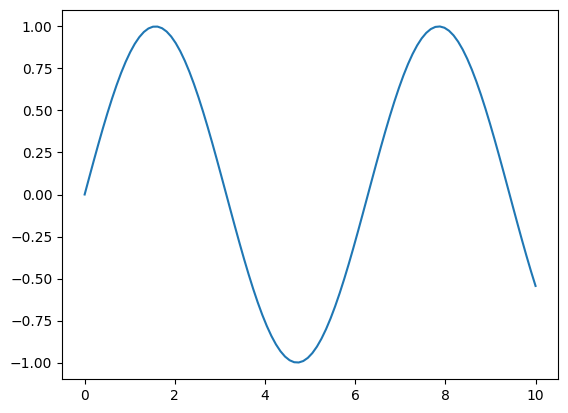

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

Even at this stage, there are many possibilities to personalize the outcome.

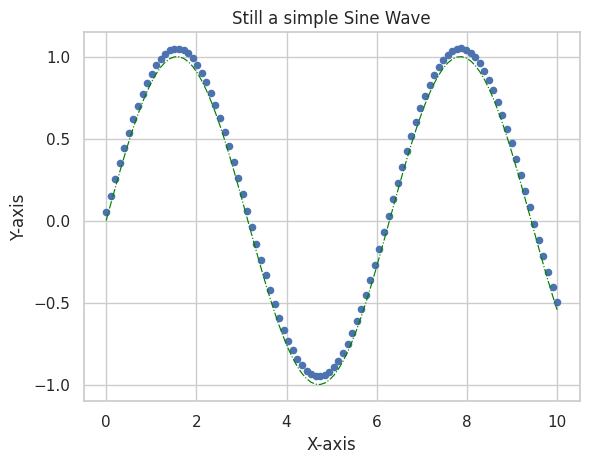

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Simple line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, color='green', linewidth=0.85, linestyle='-.')
#plt.plot(x, -y, color='red', linewidth=3.85, linestyle='-')
#plt.scatter(x,y+0.05, s=20)
plt.title("Still a simple Sine Wave")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

There is a second option, the "Object-Oriented" version. This also clarifies better what is happening "under the hood".
While it can be complex, understanding its basic structure is key. The main objects are the `Figure` (the entire window) and the `Axes` (the individual plot).

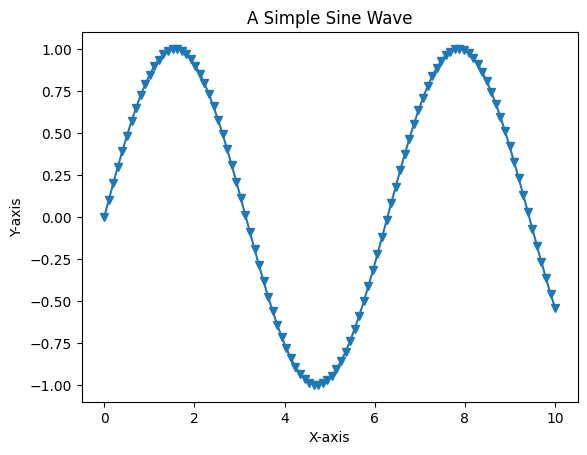

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Simple line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, y, marker='v')
ax.set_title("A Simple Sine Wave")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
plt.show()

### The different components

Pyplot is very flexible, since most components are individual "objects" and can be specifically targeted and changed. (see e.g. https://www.geeksforgeeks.org/python/python-introduction-matplotlib/ )

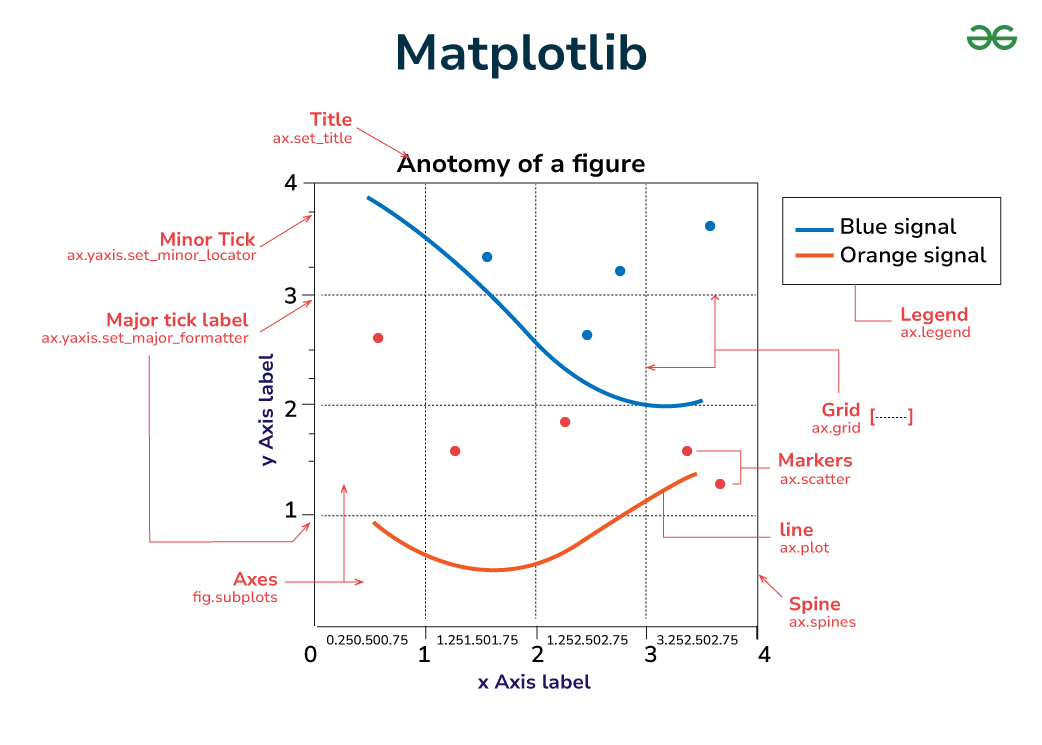

In [14]:
# The Figure contains the "graphs" which are called axes
print( fig.axes )
print("The axes are actually a list: type(axes) = ", type(fig.axes))

[<Axes: title={'center': 'A Simple Sine Wave'}, xlabel='X-axis', ylabel='Y-axis'>]
The axes are actually a list: type(axes) =  <class 'list'>


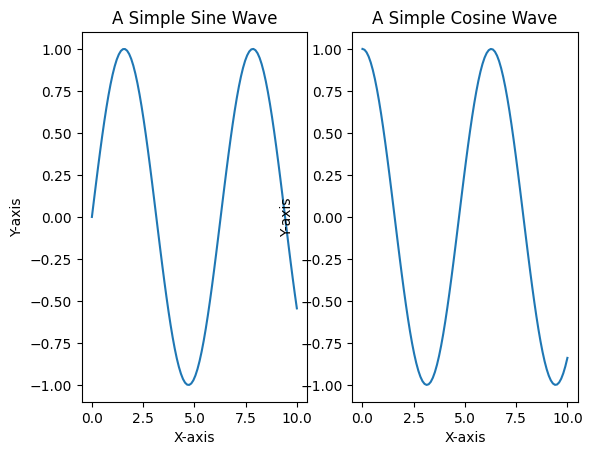

In [44]:
# Simple line plot
x = np.linspace(0, 10, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)


#fig, (ax1,ax2) = plt.subplots(1,2, figsize=[6,3], layout="constrained") 
fig, (ax1,ax2) = plt.subplots(1,2)  # Create a figure and two axes.
ax1.plot(x, y_sin)
ax1.set_title("A Simple Sine Wave")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")

ax2.plot(x, y_cos)
ax2.set_title("A Simple Cosine Wave")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")

plt.show()

In [45]:
# The Figure contains the "graphs" which are called axes
print( fig.axes )
print("Now axes contains TWO axis! \n The first:", fig.axes[0], "\n and the second:", fig.axes[0] )

[<Axes: title={'center': 'A Simple Sine Wave'}, xlabel='X-axis', ylabel='Y-axis'>, <Axes: title={'center': 'A Simple Cosine Wave'}, xlabel='X-axis', ylabel='Y-axis'>]
Now axes contains TWO axis! 
 The first: Axes(0.125,0.11;0.352273x0.77) 
 and the second: Axes(0.125,0.11;0.352273x0.77)


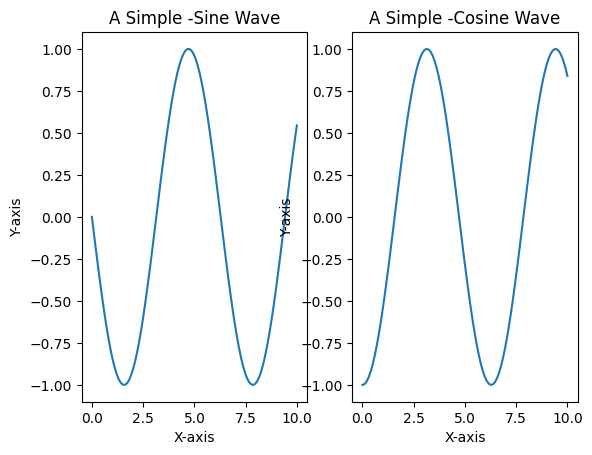

In [46]:
#fig, (ax1,ax2) = plt.subplots(1,2, figsize=[6,3], layout="constrained") 
fig, (ax1,ax2) = plt.subplots(1,2)  # Create a figure and two axes.
fig.axes[0].plot(x, -y_sin)
fig.axes[0].set_title("A Simple -Sine Wave")
fig.axes[0].set_xlabel("X-axis")
fig.axes[0].set_ylabel("Y-axis")

fig.axes[1].plot(x, -y_cos)
fig.axes[1].set_title("A Simple -Cosine Wave")
fig.axes[1].set_xlabel("X-axis")
fig.axes[1].set_ylabel("Y-axis")

plt.show()

#### The ```mosaic``` plot subdivision

If one needs to create a non-standard framework, pyplot contains the ```subplot_mosaic``` function that receives an array (either numpy or list is fine). The figure automatically detects portion of the grid with the same names and merges them in a single image. To access them, one can use their "name" as defined in the mosaic blueprint.

In [58]:
axs_names = np.array([['cos', 'sin'], ['cos','.']])

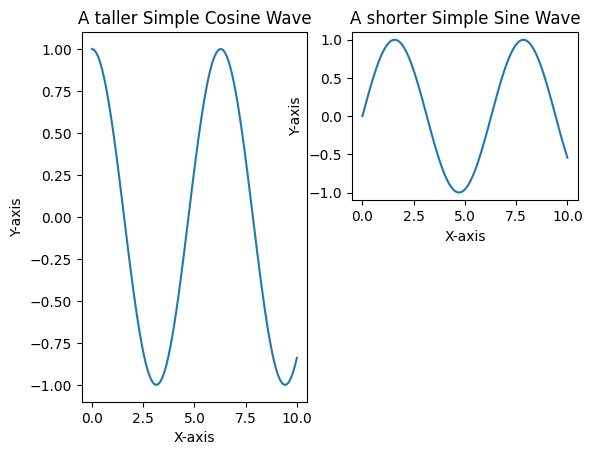

In [61]:
fig, axs = plt.subplot_mosaic(axs_names)  # Create a figure and two axes.
axs['sin'].plot(x, y_sin)
axs['sin'].set_title("A shorter Simple Sine Wave")
axs['sin'].set_xlabel("X-axis")
axs['sin'].set_ylabel("Y-axis")

axs['cos'].plot(x, y_cos)
axs['cos'].set_title("A taller Simple Cosine Wave")
axs['cos'].set_xlabel("X-axis")
axs['cos'].set_ylabel("Y-axis")

plt.show()

### 2. Seaborn: Statistical Data Visualization with Pandas Integration
Seaborn is built on top of Matplotlib and is designed to work with pandas DataFrames. 
The basic structure is pyplot *but* it facilitates making complex, statistically-informed plots directly with ```dataframe``` objects.

In [84]:
from pandas_datareader import wb

# --- 1. FETCH DATA OF GPD AND LIFE EXP---
indicators = {'NY.GDP.PCAP.KD': 'gdp_per_capita', 'SP.DYN.LE00.IN': 'life_expectancy'}

# Downloads the data for all countries, in the year 2019
data = wb.download(indicator=list(indicators.keys()), country='all', start=2019, end=2019)

# Renames the columns (which right now are NY.GDP.PCAP.KD and SP.DYN.LE00.IN) into readable words :)
data = data.rename(columns=indicators).reset_index()

# Removes any entry with NaN in those columns 
df_clean = data.dropna(subset=['gdp_per_capita', 'life_expectancy'])

# --- 2. FETCH METADATA OF COUNTRIES ---
# Get country metadata to filter out aggregates and get region info
countries_info_df = wb.get_countries()

# --- 3 Filter for countries only (not aggregate regions)
country_names = countries_info_df[countries_info_df['region'] != 'Aggregates']['name'].tolist()
df_countries = df_clean[df_clean['country'].isin(country_names)]

# --- 4 Select only the columns we need from metadata
region_data = countries_info_df[['name', 'region']]

# --- 5 Merge to add the region and income level columns 🗺️
df_final = pd.merge(df_countries, region_data, left_on='country', right_on='name', how='left')
df_final = df_final.drop(columns=['name']) # Drop redundant name column

print("Final DataFrame Head:")
print(df_final)


/tmp/ipykernel_35570/3088778353.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator=list(indicators.keys()), country='all', start=2019, end=2019)


Final DataFrame Head:
                   country  year  gdp_per_capita  life_expectancy  \
0              Afghanistan  2019      557.861533        62.941000   
1                  Albania  2019     4563.467363        79.467000   
2                  Algeria  2019     4672.664087        75.682000   
3           American Samoa  2019    12524.016025        72.751000   
4                  Andorra  2019    39346.275034        84.098000   
..                     ...   ...             ...              ...   
201               Viet Nam  2019     3241.076490        74.211000   
202  Virgin Islands (U.S.)  2019    36309.743845        79.668293   
203     West Bank and Gaza  2019     3378.434621        75.811000   
204                 Zambia  2019     1301.181330        62.914000   
205               Zimbabwe  2019     1356.838211        61.060000   

                                                region  
0    Middle East, North Africa, Afghanistan & Pakistan  
1                                Eu

In [67]:
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")

### 4. Common Plot Types for Data Exploration

**Histogram:** Understand the distribution of a single numerical variable. (https://seaborn.pydata.org/generated/seaborn.histplot.html)

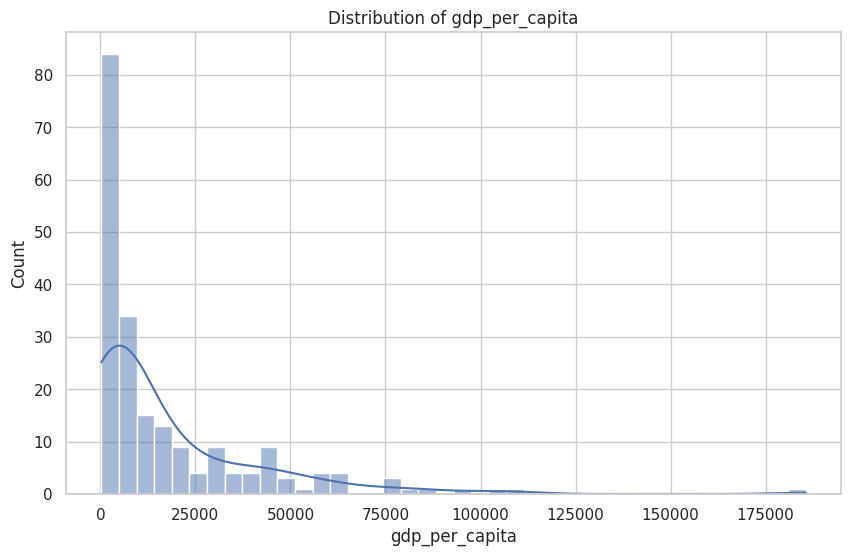

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='gdp_per_capita', kde=True, bins=40)
plt.title('Distribution of gdp_per_capita')
plt.show()

**Bar Plot:** Compare a numerical value across different categories.

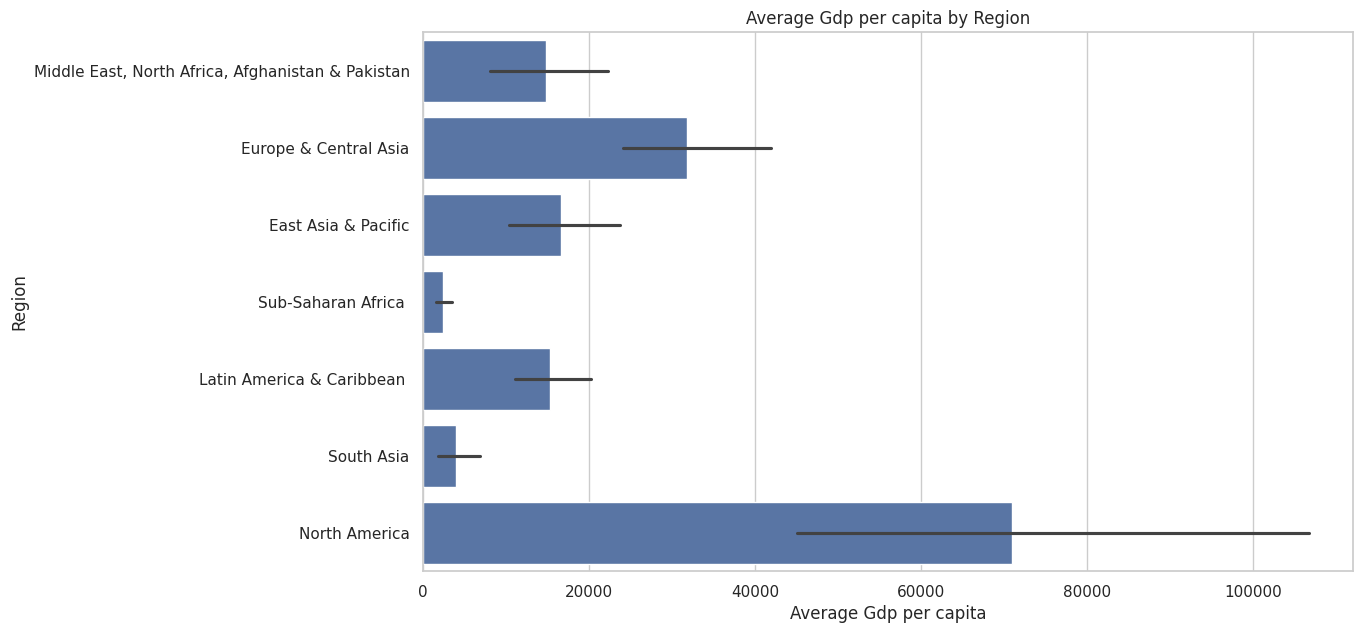

In [79]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df_final, x='gdp_per_capita', y='region')
plt.title('Average Gdp per capita by Region')
plt.xlabel('Average Gdp per capita')
plt.ylabel('Region')
plt.show()

**Box Plot:** Show the distribution of a variable across categories, highlighting quartiles and outliers.

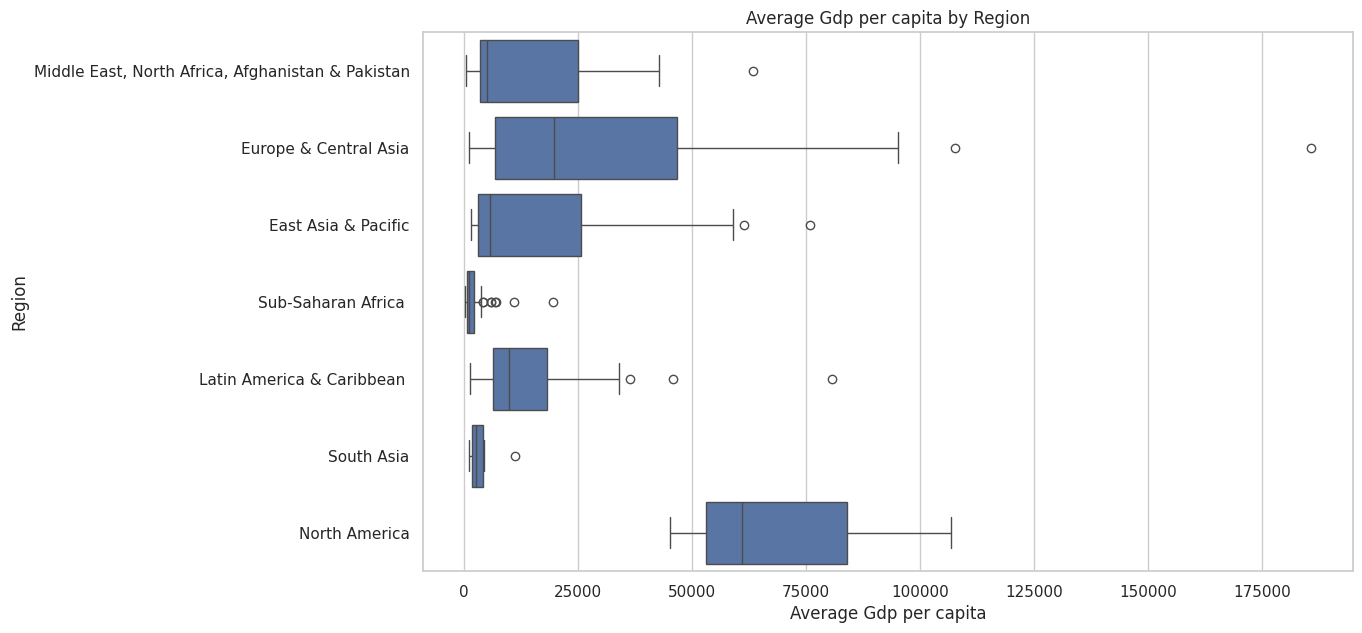

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_final, x='gdp_per_capita', y='region')
plt.title('Average Gdp per capita by Region')
plt.xlabel('Average Gdp per capita')
plt.ylabel('Region')
plt.show()

**Scatter Plot:** Investigate the relationship between two numerical variables.

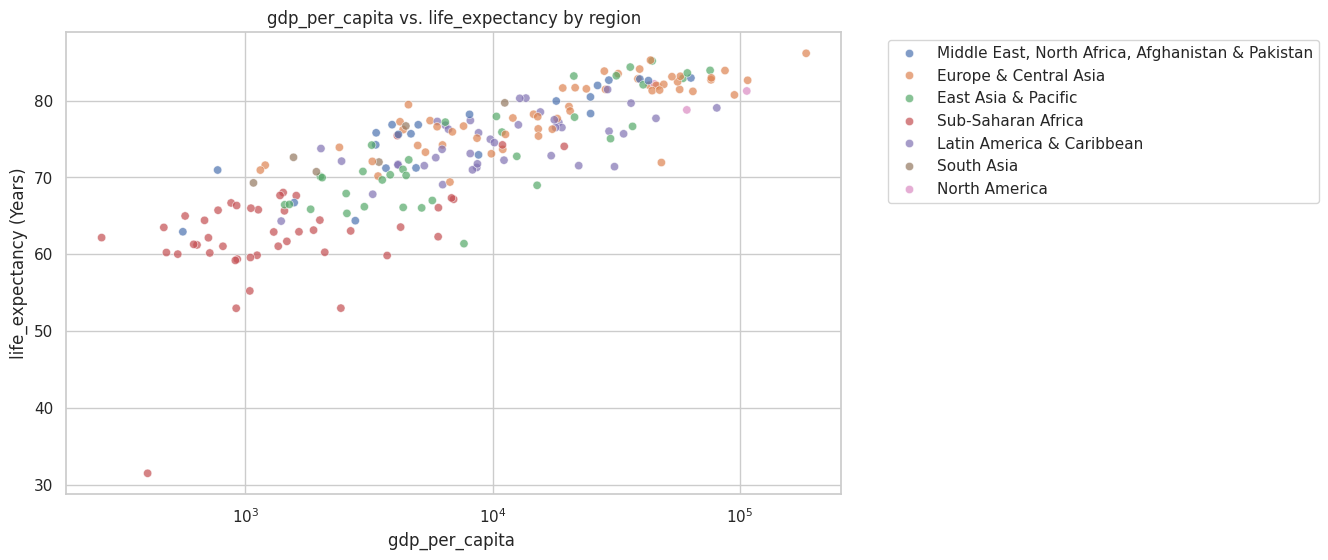

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='gdp_per_capita', y='life_expectancy', hue='region', alpha=0.7)
plt.title('gdp_per_capita vs. life_expectancy by region')
plt.xlabel('gdp_per_capita ')
plt.ylabel('life_expectancy (Years)')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df_sales = pd.read_csv('messy_sales_data.csv')
df_sales['Quantity'].fillna(df_sales['Quantity'].median(), inplace=True)

# Create plot
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['Quantity'], bins=30, kde=False)
plt.title('Distribution of Sales Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Clean region data for better plotting
df_sales['Region'].fillna('Unknown', inplace=True)
df_sales['Region'] = df_sales['Region'].str.strip().str.title()

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_sales, x='Price', y='Region')
plt.title('Price Distribution by Region')
plt.xlabel('Price')
plt.ylabel('Region')
plt.show()